# Moses Permaul - IS362 - Final Project

The Covid-19 pandemic has changed the way we live our lives during 2020 and potentially in the future. It has changed our education system, our health care system, our way of working, the way we interact with each other, and our modes of transportation to name a few. This last aspect, modes of transportation, stands out to me being a NYC resident for the last 20 years. I have taken MTA transportation in every borough and would like to explore the impact Covid-19 has had on MTA ridership numbers. With Covid-19 cases increasing in New York City since the start of the pandemic, and various regulations/changes put in place, there has been without a doubt a massive impact. A comparison between ridership numbers from 2019 and 2020 will obviously show a massive change. Instead of trying to analyze this comparison, I’m more interested to find out if there is a correlation between the number of cases and day to day death rate on the ridership numbers.

Using live updating data from The NY Times, as well as daily updated data from the MTA, I will try and answer the following question:

> **Does the mortality rate of Covid-19 in New York City have a correlation to the MTA ridership numbers?**

### Python Code for Imports and Reading the Data
To begin, we will:
1. Import the libraries needed.
2. Build DataFrames using the NY Times and MTA URLs.

In [1]:
# standard imports for matplotlib, numpy, pandas, and seaborn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# enable inline plotting
%matplotlib inline

# url links for NY Times Covid-19 Data, links for counties and state
url_nytimes_counties = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
url_nytimes_state = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

# url link for MTA Ridership numbers
url_mta = 'https://new.mta.info/document/20441'

# create DataFrame by reading the NY Times URLs
df1 = pd.read_csv(url_nytimes_counties)
df2 = pd.read_csv(url_nytimes_state)

# create DataFrame by reading the MTA URL
df3 = pd.read_csv(url_mta)

# make a copy of DataFrames to preserve origanal imports
df_counties = df1.copy()
df_states = df2.copy()
df_mta = df3.copy()

### NY Times Covid-19 State Dataframe - Cleaning our Data
#### 1. We will first display the first 5 rows of our NY Times state DataFrame to get an idea of what the data looks like.

In [2]:
# view first 5 rows
df_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


**We have 5 columns:**

* **date**: the date the data was reported
* **state**: the state the county resides in
* **fips**: a standard geographic identifier
* **cases**: the total number of positive Covid-19 cases reported so far
* **deaths**: the total number of deaths reported so far

We can see one problem already with our data. The problem is that once a case is reported, it will continuoulsy be reported when there is another update to the data. This will make aggregation functions incorrect, and will throw off our analysis if not managed properly.

#### 2. To start, we will clean this data by converting the "date" column to type datetime and dropping the column "fips" as we aren't using it for our analysis.

In [3]:
# convert the 'date' column to datetime format, errors param set to 'coerce'
df_states.date = pd.to_datetime(df_states.date, errors='coerce')

# drop "fips" column as it's not relevant
df_states.drop(columns=['fips'], inplace=True)

# view first 5 rows
df_states.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


#### 3. In order to tackle our problem, we will sort our dataframe by "date" and then drop all duplicate states, keeping only the last entry. This should give us the last update per state which will have the lastest numbers..

In [4]:
# resave our DataFrame with our sorted data
df_states = df_states.sort_values('date').drop_duplicates('state', keep='last')

The data is now clean and statistics can be performed on it.

### Analyzing the State Data
#### 1. The data provided is for the 50 contenential states and its territories/commonwealths. We will calculate the Covid-19 death rate for each state/territory and then rank them to find out which 10 has the highest rate.

##### Note: Population size is not taken into account for this analysis. For example, if a state had 1 case and 1 death, then the death rate will be 100%.

In [5]:
# add "death rate" column with calculated percentage
df_states['death rate'] = (df_states.deaths/df_states.cases) * 100

# create DataFrame with the "death rate %" top 10 rankings
df_top_rates = df_states.sort_values(by='death rate', ascending=False).head(10)

# view DataFrame
df_top_rates

,date,state,cases,deaths,death rate
15722,2020-12-13,New York,780831,35198,4.507762
15720,2020-12-13,New Jersey,402518,17751,4.409989
15711,2020-12-13,Massachusetts,290578,11349,3.905664
15695,2020-12-13,Connecticut,146761,5363,3.654241
15697,2020-12-13,District of Columbia,24874,715,2.874487
15729,2020-12-13,Pennsylvania,495906,12613,2.543426
15708,2020-12-13,Louisiana,268613,6818,2.538224
15712,2020-12-13,Michigan,464606,11186,2.407631
15714,2020-12-13,Mississippi,179447,4199,2.339967
15710,2020-12-13,Maryland,234975,5117,2.177678


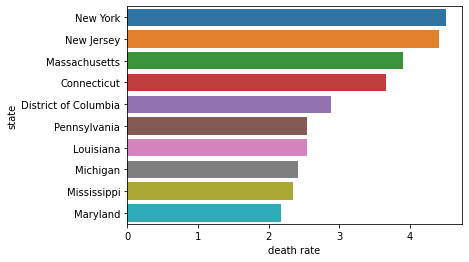

In [6]:
# create a visualization using seaborn bar plot
sns.barplot(
    data = df_top_rates, # .reset_index(), 
    x = 'death rate',
    y = 'state')

The bar plot validates our ranking data and allows us to visualize the states with the highest death rate. 

New York is currently listed within the top 10 states that has the highest death rates. In relation to the MTA, this confirms that the MTA would be one of the services that would be impacted heavily by the Covid-19 pandemic.

#### 2. Another analysis that we want to do is to see what the current cases and death count is across all states. Doing this will allow us to calculate a death rate using data from all states.

In [7]:
# create DataFrame and store grouped data
df_all_states = df_states.iloc[:, :4].groupby('date').sum()

# add "death rate" column with calculated percentage
df_all_states['death rate'] = (df_all_states.deaths/df_all_states.cases) * 100

# view the DataFrame
df_all_states

,cases,deaths,death rate
date,,,
2020-12-13,16368840,299328,1.828645


### NY Times Covid-19 County Dataframe - Cleaning our Data
#### 1. We will first display the first 5 rows of our NY Times county DataFrame to get an idea of what the data looks like.

In [8]:
# view the first 5 rows
df_counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


**We have 6 columns:**

* **date**: the date the data was reported
* **county**: the county that the data was reported in 
* **state**: the state the county resides in
* **fips**: a standard geographic identifier
* **cases**: the total number of positive Covid-19 cases reported so far
* **deaths**: the total number of deaths reported so far



The data looks very similar to our state data. The main difference is the inclusion of the "county" column.

#### 2. The MTA opperates within New York City meaning that we will only need to focus on "county" equal to "New York City". Once filtered, we will do the same cleaning actions as before and then calculae the death rate and rate change.  We will also drop the "state" column as we don't need it anymore. 

In [9]:
# create new DataFrame with our filter
df_nyc = df_counties[df_counties.county == 'New York City'].copy()

# convert the 'date' column to datetime format, errors param set to 'coerce'
df_nyc.date = pd.to_datetime(df_nyc.date, errors='coerce')

# set index as date
df_nyc.set_index('date', inplace=True)

# drop "fips" column as it's not relevant
df_nyc.drop(columns=['fips', 'state'], inplace=True)

# add "death rate" column with calculated percentage
df_nyc['death rate'] = (df_nyc.deaths/df_nyc.cases) * 100

# use pct_change method to calculate the changing day to day rate change
df_nyc['rate change'] = (df_nyc['death rate'].pct_change().round(4))*100

# view first 15 rows
df_nyc.head(15)

,county,cases,deaths,death rate,rate change
date,,,,,
2020-03-01,New York City,1,0.0,0.000000,NaN
2020-03-02,New York City,1,0.0,0.000000,NaN
2020-03-03,New York City,2,0.0,0.000000,NaN
2020-03-04,New York City,2,0.0,0.000000,NaN
2020-03-05,New York City,4,0.0,0.000000,NaN
2020-03-06,New York City,5,0.0,0.000000,NaN
2020-03-07,New York City,12,0.0,0.000000,NaN
2020-03-08,New York City,14,0.0,0.000000,NaN
2020-03-09,New York City,20,0.0,0.000000,NaN


#### 3. Looking at our DataFrame, we have "NaN" listed as the rate change in the rows where we have a value for cases, but 0 for deaths. We also have "inf" listed as the rate change when we have our first row with a death. We need to do some actions to clean this.

In [10]:
# replace np.inf with np.nan
df_nyc['rate change'].replace(np.inf, np.nan, inplace=True)

# fill np.NaN values with zero
df_nyc['rate change'].fillna(0, inplace=True)

# view first 15 rows
df_nyc.head(15)

,county,cases,deaths,death rate,rate change
date,,,,,
2020-03-01,New York City,1,0.0,0.000000,0.00
2020-03-02,New York City,1,0.0,0.000000,0.00
2020-03-03,New York City,2,0.0,0.000000,0.00
2020-03-04,New York City,2,0.0,0.000000,0.00
2020-03-05,New York City,4,0.0,0.000000,0.00
2020-03-06,New York City,5,0.0,0.000000,0.00
2020-03-07,New York City,12,0.0,0.000000,0.00
2020-03-08,New York City,14,0.0,0.000000,0.00
2020-03-09,New York City,20,0.0,0.000000,0.00


### Analyzing the New York City Data
#### 1. We will graph our data to see what the overall pictue looks like.

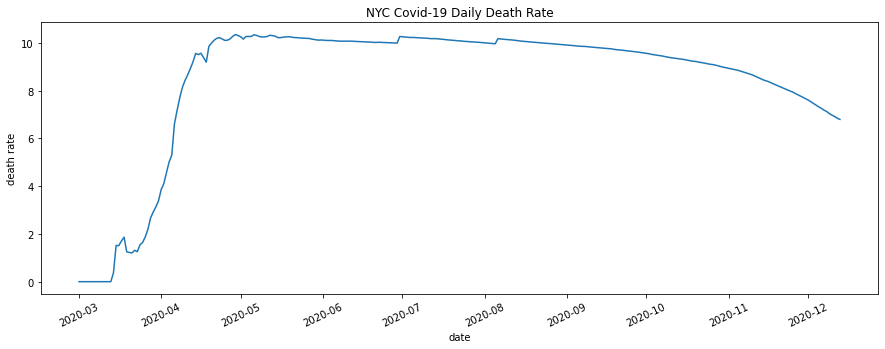

In [11]:
# set plot size
plt.figure(figsize=(15, 5))

# seaborn line plot using NYC DataFrame
sns.lineplot(data = df_nyc, x = df_nyc.index, y = 'death rate')

# set X labels to rotate for better visibility
plt.xticks(rotation=25)

# set plot title
plt.title('NYC Covid-19 Daily Death Rate')

# display plot
plt.show()

Looking at our plot of the daily death rate, we can see that between the months of March and May 2020, the death rate had a fairly steep increase, and then held relativly steading for the next few months. We had some increases in July and August, but the death rate has been on a decline.

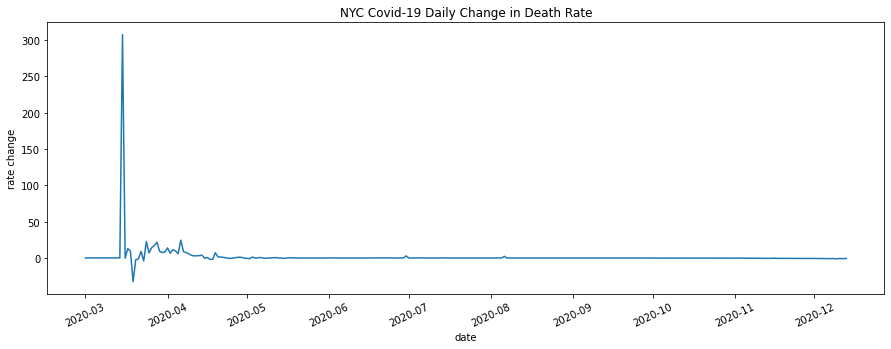

In [12]:
# set plot size
plt.figure(figsize=(15, 5))

# seaborn line plot using NYC DataFrame
sns.lineplot(data = df_nyc, x = df_nyc.index, y = 'rate change')

# set X labels to rotate for better visibility
plt.xticks(rotation=25)

# set plot title
plt.title('NYC Covid-19 Daily Change in Death Rate')

# display plot
plt.show()

Looking at our plot of the daily change in the death rate, we see a huge spike which represents the initials deaths at the beginning of the pandemic. We can then see it fluctuate between March and May, and eventually holds steady from May onwards. The near steady line from May onwards signals that their hasn't been a large change in the death rate.

### MTAvCovid-19 Ridership Dataframe - Cleaning our Data
#### 1. We will first display the first 5 rows of our MTA DataFrame to get an idea of what the data looks like.

In [18]:
# view the first 5 rows
df_mta.head()

,Date,Subways: Total Estimated Ridership,Subways: % Change From 2019 Equivalent Day,Buses: Total Estimated Ridership,Buses: % Change From 2019 Equivalent Day,LIRR: Total Estimated Ridership,LIRR: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Metro-North: Total Estimated Ridership,Metro-North: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Access-A-Ride: Total Scheduled Trips,Access-A-Ride: % Change From 2019 Monthly Weekday/Saturday/Sunday Average,Bridges and Tunnels: Total Traffic,Bridges and Tunnels: % Change From 2019 Equivalent Day
0,12/9/2020,TBD,TBD,TBD,TBD,74700.0,-76%,50900.0,-82%,22459,-21.2%,749886,-15.0%
1,12/8/2020,1704854,-71.2%,966814,-57%,75000.0,-76%,51900.0,-81%,22177,-22.2%,744112,-18.2%
2,12/7/2020,1658337,-70.5%,1001650,-51%,77800.0,-75%,52600.0,-81%,21424,-24.8%,729674,-16.7%
3,12/6/2020,878518,-67.1%,542997,-48%,35100.0,-67%,31900.0,-70%,9904,-46.3%,590525,-28.5%
4,12/5/2020,1000663,-71.6%,617555,-53%,33500.0,-74%,37900.0,-76%,10151,-41.1%,572557,-36.2%


The data provided includes more than just the subway and bus ridership numbers. As we are only interested in the subway and bus numbers, we will keep only the first 5 columns. We will also rename the columns to something less wordy.

#### 2. Cleaning the DataFrame

In [19]:
# resave the DataFrame with only the first 4 columns
df_mta = df_mta.iloc[:,0:5]

# rename columns inplace
df_mta.rename({'Subways: Total Estimated Ridership':'Subway Riders'}, axis=1, inplace=True)
df_mta.rename({'Subways: % Change From 2019 Equivalent Day':'Subway Change %'}, axis=1, inplace=True)
df_mta.rename({'Buses: Total Estimated Ridership':'Bus Riders'}, axis=1, inplace=True)
df_mta.rename({'Buses: % Change From 2019 Equivalent Day':'Bus Change %'}, axis=1, inplace=True)

# view the first 5 rows
df_mta.head()

,Date,Subway Riders,Subway Change %,Bus Riders,Bus Change %
0,12/9/2020,TBD,TBD,TBD,TBD
1,12/8/2020,1704854,-71.2%,966814,-57%
2,12/7/2020,1658337,-70.5%,1001650,-51%
3,12/6/2020,878518,-67.1%,542997,-48%
4,12/5/2020,1000663,-71.6%,617555,-53%


#### 3. We will check the data type for each column to make sure that we can do some statistics. The % signs on our change columns suggests that we have some objects and not integers/floats.

In [20]:
# check data types
df_mta.dtypes

Date               object
Subway Riders      object
Subway Change %    object
Bus Riders         object
Bus Change %       object
dtype: object

As expected, this will be a problem for us so we will need to convert our columns.

In [21]:
# convert the 'date' column to datetime format, errors param set to 'coerce'
df_mta.Date = pd.to_datetime(df_mta.Date, errors='coerce')

# convert columns using to_numeric
df_mta['Subway Riders'] = pd.to_numeric(df_mta['Subway Riders'], errors='coerce')
df_mta['Bus Riders'] = pd.to_numeric(df_mta['Bus Riders'], errors='coerce')

# lambda function to split on %
df_mta['Subway Change %'] = df_mta['Subway Change %'].apply(lambda x: x.split('%')[0])
df_mta['Bus Change %'] = df_mta['Bus Change %'].apply(lambda x: x.split('%')[0])

# convert change columns using to_numeric
df_mta['Subway Change %'] = pd.to_numeric(df_mta['Subway Change %'], errors='coerce')
df_mta['Bus Change %'] = pd.to_numeric(df_mta['Bus Change %'], errors='coerce')

# re-check data types
df_mta.dtypes

Date               datetime64[ns]
Subway Riders             float64
Subway Change %           float64
Bus Riders                float64
Bus Change %              float64
dtype: object

We now have proper data types on our MTA DataFrame.

#### 4. We will set the "date" column as our index and create a new column with the calculation for the total number of riders each day across both busses and subways.

In [22]:
# set index as date
df_mta.set_index('Date', inplace=True)

# create new column as sum of subway and bus riders
df_mta['Total Riders'] = df_mta['Subway Riders'] + df_mta['Bus Riders']

# drop rows with NaN as they are not updated yet
df_mta.dropna(axis=0, how='any', inplace=True)

# view the first 5 rows
df_mta.head()

,Subway Riders,Subway Change %,Bus Riders,Bus Change %,Total Riders
Date,,,,,
2020-12-08,1704854.0,-71.2,966814.0,-57.0,2671668.0
2020-12-07,1658337.0,-70.5,1001650.0,-51.0,2659987.0
2020-12-06,878518.0,-67.1,542997.0,-48.0,1421515.0
2020-12-05,1000663.0,-71.6,617555.0,-53.0,1618218.0
2020-12-04,1704079.0,-71.4,1009132.0,-54.0,2713211.0


#### 5. We will graph our data to visualize the trends in the numbers.

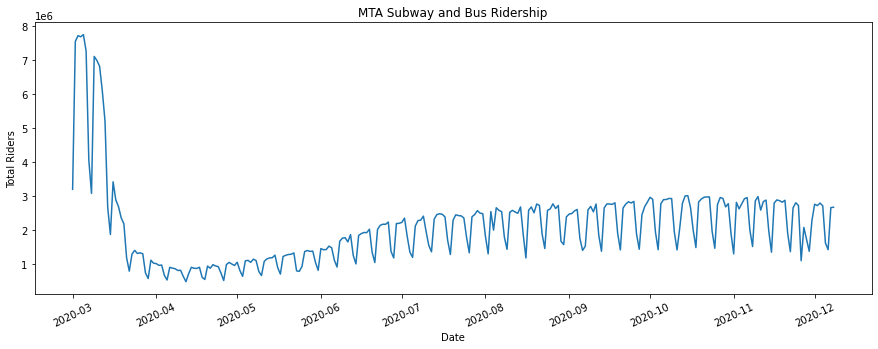

In [23]:
# set plot size
plt.figure(figsize=(15, 5))

# seaborn line plot using NYC DataFrame
sns.lineplot(data = df_mta, x = df_mta.index, y = 'Total Riders')

# set X labels to rotate for better visibility
plt.xticks(rotation=25)

# set plot title
plt.title('MTA Subway and Bus Ridership')

# display plot
plt.show()

Looking at the line plot, we can see that the total number of riders dropped significantly at the beginning of the Pandemic. The ridership numbers continued to stay low for the next few months, with a gradual increase starting in mid April.

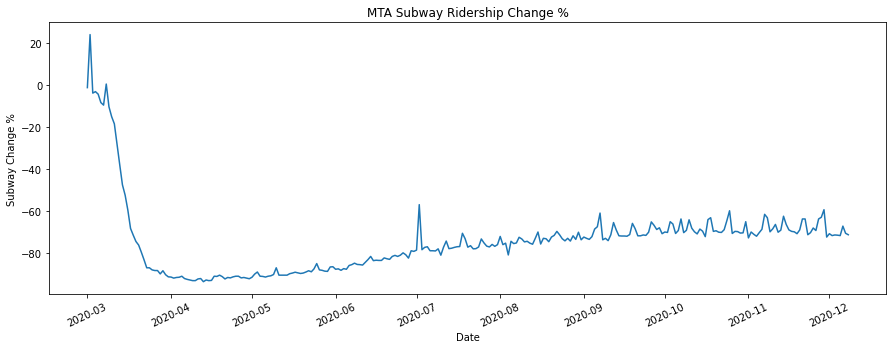

In [28]:
# set plot size
plt.figure(figsize=(15, 5))

# seaborn line plot using NYC DataFrame
sns.lineplot(data = df_mta, x = df_mta.index, y = 'Subway Change %')

# set X labels to rotate for better visibility
plt.xticks(rotation=25)

# set plot title
plt.title('MTA Subway Ridership Change %')

# display plot
plt.show()

Looking at the Subway ridership % change between 2019 and 2020, we see the same trend as our total ridership numbers. There was a drastic drop starting in March, and a slow recovery that's still showing more than a 60% drop in ridership numbers.

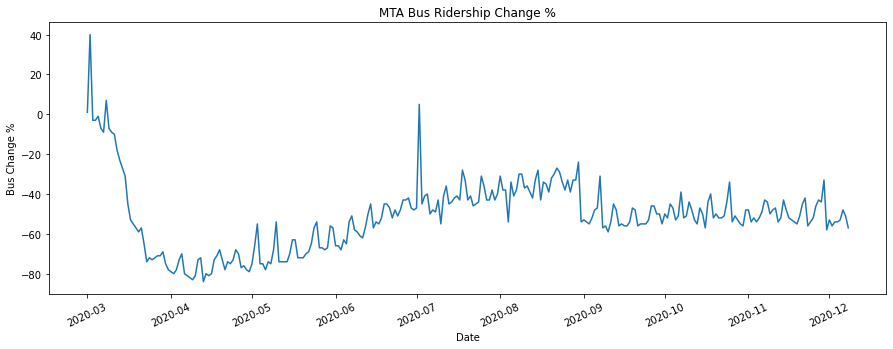

In [26]:
# set plot size
plt.figure(figsize=(15, 5))

# seaborn line plot using NYC DataFrame
sns.lineplot(data = df_mta, x = df_mta.index, y = 'Bus Change %')

# set X labels to rotate for better visibility
plt.xticks(rotation=25)

# set plot title
plt.title('MTA Bus Ridership Change %')

# display plot
plt.show()

Looking at the Bus ridership % change between 2019 and 2020, we see a similar drop in March, however, there higher rate of recover when compared to the Subway numbers. At the end of June and beginning of July, the change in number of riders went over 0.0%, which means that there was an increae in riders on busses when compared to last year.

### Conclusion

The question that we were trying to answer was:

> **Does the mortality rate of Covid-19 in New York City have a correlation to the MTA ridership numbers?**

After analyzing our data, we can confirm that **Yes**, the death rate does have a correlation to the MTA ridership numbers. The death rate in the beginning of the pandemic increased failry rapidly as the number of cases were low and the deaths were increasing. This increasing death rate spiked in March, and as seen on our plots, coencides with the drastic drop in ridership numbers.

As of August 2020, the death rate has been on a decline, but ridership numbers have started trending back up starting in May. The ridership numbers are drasticaly lower, maintaining more than a 60% change when compared to last year, which means that even though we see a upward trend in rider numbers, the impact of Covid-19 effects are still heavily present and is still affecting the MTA.